# Vignette of Pypi-Package hapROH: Calling and visualizing ROH 
This notebook contains an example application of hapROH: We will identify ROH in a target Eigenstrat dataset from a recent publication (Skourtanioti et al., 2023).
You will learn how to run hapROH on chromosomes of signle individuals, and sets of individuals, and how to post-process multiple output files into one summary datafile (including meta data). We will explore the most useful plotting functions, and how to estimate Ne and contamination from ROH.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

import os as os
import sys as sys
import multiprocessing as mp

print(f"CPU Count: {mp.cpu_count()}")

CPU Count: 14


### Get reference data

Normally you cat download the reference data from `https://www.dropbox.com/s/0qhjgo1npeih0bw/1000g1240khdf5.taz.gz?dl=0`

In [12]:
#### We will run the download command at the command line:

#!wget https://www.dropbox.com/s/0qhjgo1npeih0bw/1000g1240khdf5.taz.gz?dl=0

### Let's set the path to our dataset

In [5]:
import sys
### Fill in your own path here!
path = "/vol/volume/haproh/HAAM25_hapROH/"  # The Path to Package Midway Cluster
os.chdir(path)  # Set the right Path (in line with Atom default)
print(f"Set path to: {os.getcwd()}") # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns

Set path to: /vol/volume/haproh/HAAM25_hapROH


### Let's have a look into the dataset with poseidon-trident

In [3]:
!echo "Hello from Bash" ### exclamation mark means we are using bash

!ls /vol/volume/packages-poseidon/2023_Skourtanioti_Aegean-1.0.1/

!trident summarise -d /vol/volume/packages-poseidon/2023_Skourtanioti_Aegean-1.0.1

Hello from Bash
2023_Skourtanioti_Aegean.bed  2023_Skourtanioti_Aegean.fam    POSEIDON.yml
2023_Skourtanioti_Aegean.bib  2023_Skourtanioti_Aegean.janno
2023_Skourtanioti_Aegean.bim  CHANGELOG.md
trident v1.6.2.1 for poseidon v2.5.0, v2.6.0, v2.7.0, v2.7.1
https://poseidon-framework.github.io

[Info]    Checking base directories... 
[Info]    Searching POSEIDON.yml files... 
[Info]    1 found
[Info]    Checking Poseidon versions... 
[Info]    Initializing packages... 
[Info]    Packages loaded: 1
[Info]    Note that only the latest versions of packages are included in the summary
.--------------------.--------------------------------------------------------------.
|      Summary       |                            Value                             |
:====================:==============================================================:
| Nr Samples         | 103                                                          |
| Samples            | AID001, AID002, AID007, AID008, AID009, AID010,

**Let's explore the columns of the annotation file**

In [4]:
!head -1 /vol/volume/packages-poseidon/2023_Skourtanioti_Aegean-1.0.1/2023_Skourtanioti_Aegean.janno | sed s/'\t'/'\n'/g

Poseidon_ID
Genetic_Sex
Group_Name
Alternative_Group_Name
Alternative_IDs
Relation_To
Relation_Degree
Relation_Type
Relation_Note
Collection_ID
Country
Location
Site
Latitude
Longitude
Date_Type
Date_C14_Labnr
Date_C14_Uncal_BP
Date_C14_Uncal_BP_Err
Date_BC_AD_Start
Date_BC_AD_Median
Date_BC_AD_Stop
Date_Note
MT_Haplogroup
Y_Haplogroup
Source_Tissue
Nr_Libraries
Capture_Type
UDG
Library_Built
Genotype_Ploidy
Nr_SNPs
Coverage_on_Target_SNPs
Primary_Contact
Publication


##### **Essential meta-information for hapROH is `Poseidon_ID` (`'id'`), `Group_name` (`'clst'`), and `Date_BC_AD_Median` (`'age'`); also `Genetic_Sex`, `Nr_SNPs`, `Latitude`, `Longitude` and `Location`.**

### Step1: convert from plink to eigenstrat format

In [ ]:
!trident genoconvert \
  --bedFile /vol/volume/packages-poseidon/2023_Skourtanioti_Aegean-1.0.1/2023_Skourtanioti_Aegean.bed \
  --famFile /vol/volume/packages-poseidon/2023_Skourtanioti_Aegean-1.0.1/2023_Skourtanioti_Aegean.fam \
  --bimFile /vol/volume/packages-poseidon/2023_Skourtanioti_Aegean-1.0.1/2023_Skourtanioti_Aegean.bim \
  -o /vol/volume/packages-poseidon/2023_Skourtanioti_Aegean_eigen \
  --outFormat EIGENSTRAT

In [ ]:
##Quick look into the *ind file
ind_frame = pd.read_csv("/vol/volume/packages-poseidon/2023_Skourtanioti_Aegean_eigen/2023_Skourtanioti_Aegean.ind", sep='\t', header=None)
ind_frame

### Step 2: Call ROH (on specific individuals)
#### Example run of whole individual (all chromosomes) with output to logfile

In [5]:
from hapsburg.PackagesSupport.hapsburg_run import hapsb_ind  ##import function 

In [6]:
hapsb_ind(iid="AID008", chs=range(1,23),
          path_targets='/vol/volume/packages-poseidon/2023_Skourtanioti_Aegean_eigen/2023_Skourtanioti_Aegean', 
          h5_path1000g='/vol/volume/haproh/1000g1240khdf5/all1240/chr',  ## reference panel (1000G); per chromosome - hdf5 format
          meta_path_ref='/vol/volume/haproh/1000g1240khdf5/all1240/meta_df_all.csv', ### metainfo for reference panel
          folder_out='./indExample', ## Name of directory where you want to store your results
          e_model="haploid", p_model="Eigenstrat", output=False, save=True,
          processes=4, ## will run 4 chromosomes in parallel
          
          post_model='Standard', 
          save_fp=False, n_ref=2504, exclude_pops=[], 
          roh_in=1, roh_out=20, roh_jump=300, e_rate=0.01, e_rate_ref=0.0, 
          cutoff_post=0.999, max_gap=0, 
          random_allele=True, readcounts=False, # Whether to pick one of two alleles at Target Individual at random; whether to return Readcounts
          logfile=False, combine=True, file_result='_roh_full.csv')  ## logfile=False will output log but won't save it

Using Rescaled HMM.Using Rescaled HMM.Using Rescaled HMM.Using Rescaled HMM.



Loaded Pre Processing Model: EigenstratLoaded Pre Processing Model: EigenstratLoaded Pre Processing Model: Eigenstrat

Loaded Pre Processing Model: Eigenstrat

Loading Individual: AID008Loading Individual: AID008Loading Individual: AID008Loading Individual: AID008




Loaded 77652 variants
Loaded 59890 variants

Loaded 89147 variants
Loaded 2504 individualsLoaded 2504 individuals


Loaded 2504 individualsHDF5 loaded from /vol/volume/haproh/1000g1240khdf5/all1240/chr7.hdf5
HDF5 loaded from /vol/volume/haproh/1000g1240khdf5/all1240/chr3.hdf5
HDF5 loaded from /vol/volume/haproh/1000g1240khdf5/all1240/chr1.hdf5
Loaded 69399 variants


Loaded 2504 individuals
HDF5 loaded from /vol/volume/haproh/1000g1240khdf5/all1240/chr5.hdf5
Eigenstrat packed: FalseEigenstrat packed: FalseEigenstrat packed: FalseEigenstrat packed: False



3 Eigenstrat Files with 103 Individuals and 1233013 SNPs3 Eigenstrat Files with 103 Indi

/home/ubuntu/bin/miniconda3/envs/haproh/lib/python3.12/site-packages/hapsburg/PackagesSupport/parallel_runs/helper_functions.py:98: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  full_df = pd.concat(full_df_vec)


,Start,End,StartM,EndM,length,lengthM,iid,ch,StartPosGRCh37,EndPosGRCh37
0,4689,7037,0.279616,0.372063,2348,0.092447,AID008,3,11736290,18929861
0,10520,12001,0.565448,0.607642,1481,0.042194,AID008,5,38119545,44392142
0,30591,31805,1.048921,1.102692,1214,0.053771,AID008,6,100300738,106292430
1,42305,49737,1.507634,1.879433,7432,0.371799,AID008,6,147549297,168478917
0,368,3723,0.065563,0.285677,3355,0.220114,AID008,14,21432455,33829320
0,16495,19806,0.954418,1.172732,3311,0.218314,AID008,17,67519542,76849664


### Output files

In [7]:
!ls ./indExample

AID008	AID008_roh_full.csv


In [8]:
!ls ./indExample/AID008

chr1   chr11  chr13  chr15  chr17  chr19  chr20  chr22	chr4  chr6  chr8
chr10  chr12  chr14  chr16  chr18  chr2   chr21  chr3	chr5  chr7  chr9


In [9]:
!ls ./indExample/AID008/chr17

hap.csv  hmm_run_log.txt  map.csv  pos.csv  posterior0.csv  roh.csv


### Step 3.1: Let's visualize ROH for AID008!

In [10]:
from hapsburg.figures.plot_individual_roh import plot_roh_individual ## "Karyotype'

In [ ]:
plot_roh_individual(iid="AID008", folder="./indExample/", 
                    prefix_out="", min_cm=4, snp_cm=50, savepath="", plot_bad=False) ### emply string at savepath -> not saved
                                            # at least 50 1240k within 1 cM to call roh
                                            # plot_bad=TRUE -> plot low density areas of the genome

#### Step 3.2: Visualize posterior probability of ROH (QC)

In [11]:
from hapsburg.figures.plot_posterior import plot_posterior_cm

Successfully loaded Data from: ./indExample/AID008/chr17/


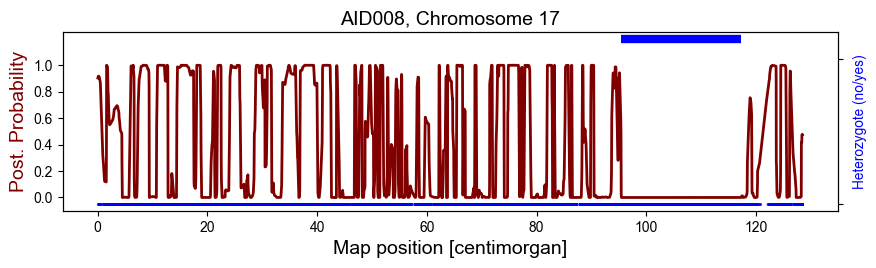

In [12]:
plot_posterior_cm(folder = "./indExample/AID008/chr17/", savepath="", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="AID008, Chromosome 17")

#### Zoom-in
We now change the `cm_lim` parameter, which allows user to zoom in

Successfully loaded Data from: ./indExample/AID008/chr17/


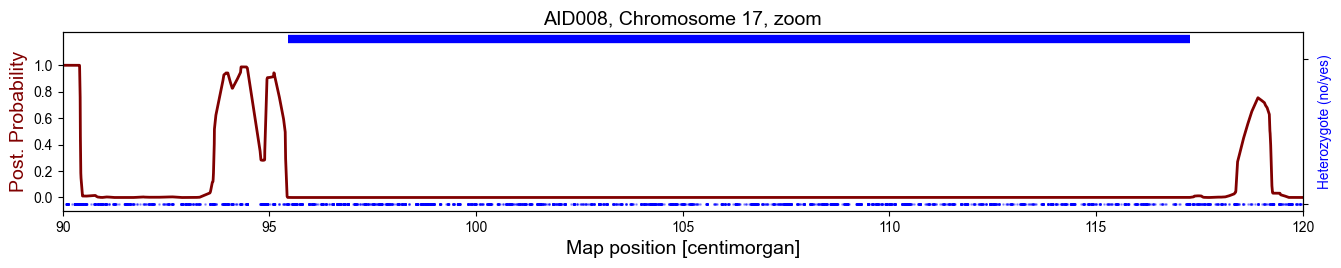

In [13]:
plot_posterior_cm(folder = "./indExample/AID008/chr17/", savepath="",
                  empirical=True, m=1, cm_lim=[90, 120], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(16,4), title="AID008, Chromosome 17, zoom")

--> Lower blue 'line' is composed of dots each one representing SNP positions from 1240k panel in that chromosome

### Great! Now let's scale the analysis to multiple individuals!
## Step 4: all ROH on multiple individuals in a loop

#### Let's run ROH for the individuals with the group label "HgCharalambos_EMBA". There are 22 in total and many of them have sufficient coverage for hapROH.

We need to subset 1. for this group and 2. for Nr_SNPs > 400,000

In [14]:
Aegean_df = pd.read_csv("/vol/volume/packages-poseidon/2023_Skourtanioti_Aegean-1.0.1/2023_Skourtanioti_Aegean.janno", sep='\t', header=0) 

subset_df = (
    Aegean_df
    .pipe(lambda df: df[(df["Group_Name"] == "HgCharalambos_EMBA") & (df["Nr_SNPs"] > 400000)])
    .pipe(lambda df: df[["Poseidon_ID", "Group_Name", "Nr_SNPs", "Date_BC_AD_Median", "Genetic_Sex"]])  # select columns
)

subset_df

,Poseidon_ID,Group_Name,Nr_SNPs,Date_BC_AD_Median,Genetic_Sex
21,HGC001,HgCharalambos_EMBA,1040566,NaN,M
23,HGC003,HgCharalambos_EMBA,511956,NaN,F
24,HGC005,HgCharalambos_EMBA,516744,NaN,M
25,HGC006,HgCharalambos_EMBA,1058362,NaN,M
26,HGC008,HgCharalambos_EMBA,747989,NaN,F
27,HGC009,HgCharalambos_EMBA,779131,NaN,M
28,HGC010,HgCharalambos_EMBA,514088,-2100.0,M
29,HGC011,HgCharalambos_EMBA,893737,-2100.0,F
32,HGC017,HgCharalambos_EMBA,910790,-2100.0,M
33,HGC018,HgCharalambos_EMBA,716850,-2100.0,M


#### Extract list of ids from dataframe

In [ ]:
%%time ##measures execution time of the entire code cell

iids = subset_df['Poseidon_ID'].to_list()

for iid in iids:
    print(f"Doing Individual: {iid}")
    hapsb_ind(iid=iid, chs=range(1,23), processes=4, 
          path_targets='/vol/volume/packages-poseidon/2023_Skourtanioti_Aegean_eigen/2023_Skourtanioti_Aegean', 
          h5_path1000g='/vol/volume/haproh/1000g1240khdf5/all1240/chr',  ## reference panel (1000G); per chromosome - hdf5 format
          meta_path_ref='/vol/volume/haproh/1000g1240khdf5/all1240/meta_df_all.csv', ### metainfo for reference panel
          folder_out='./HGC', prefix_out='', 
          e_model="haploid", p_model="Eigenstrat", n_ref=2504,
          random_allele=True, readcounts=False, output=False)

### Postprocess Results into one results.csv (copying in Meta Data)
Take indivdiual output .csvs and combine into one big results .csv
Merging of output gaps, and ROH>x cM happens here

In [6]:
from hapsburg.PackagesSupport.pp_individual_roh_csvs import pp_individual_roh

### Create Example Meta File
This file will yield the meta data file (some plotting functions use it),
which is then merged into the results when combining individuals

We can use our table after subsetting the janno file, but we need to **change the column names as follows:**

In [ ]:
subset_df.rename(columns={"Poseidon_ID": "iid", "Group_Name": "clst", "Date_BC_AD_Median": "age"}, inplace=True)

subset_df.to_csv("./HGC/meta_blank.csv", 
          sep=",", index=False)

## Combine into output File
Combines meta file, individual ROH output files
into a summary table, contaiining ROH information for each individual

In [ ]:
%%time
### Postprocess the elected Individuals from above and combine into one results .csv

df1 = pp_individual_roh(iids, meta_path="./HGC/meta_blank.csv", 
                        base_folder="./HGC",
                        save_path="./HGC/combined_roh05.csv", 
                        output=False, min_cm=[4, 8, 12, 20], snp_cm=50, 
                        gap=0.5, min_len1=2.0, min_len2=4.0)

df1

## Plot summary over multiple Individuals

First plot only expectations, for instance as a legend.
You could choose which expectations in the method parameters (plot_bars.py file)

In [15]:
from hapsburg.figures.plot_bars import plot_legend_only, plot_panel_row, prepare_dfs_plot

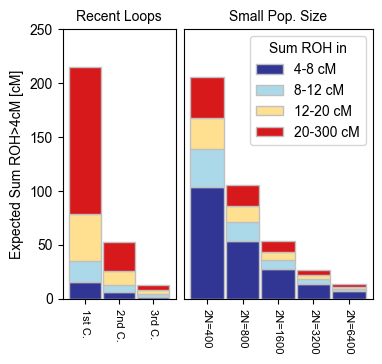

In [16]:
plot_legend_only(savepath="", figsize=[4,3.5])

#### **IMPORTANT!** The expectation for every scenario of parental relatedness is an **average**. As recombination is a stochastic process, there is a variance on ROH distribution within each scenario.

## Now let's plot our dataset. 

-prepare_dfs_plot prepared from the combined csv (splitting it up into a list of pandas dataframes, these dataframes will be plot in groups - you could also manually produce these lists (check `plot_bars.py`)

-plot_panel_row then plots these data frames  

In this simple usecase, the individuals analyzed above are plotted, together with a legend to the right.

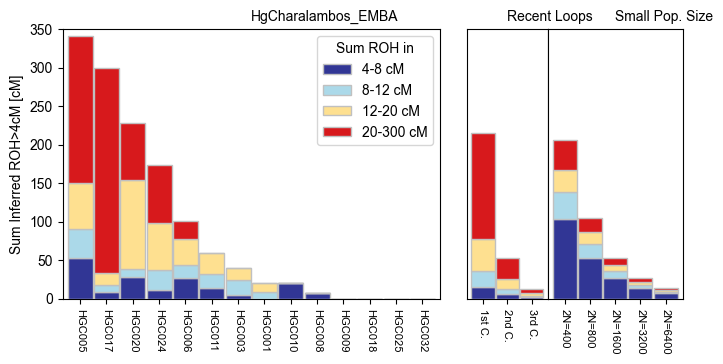

In [20]:
df1 = pd.read_csv("./HGC/combined_roh05.csv", sep='\t')
#df1["clst"] = df1["Genetic_Sex"]   ## if you want to plot for another variable
plot_dfs, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])

# for all parameters check ~/bin/miniconda3/envs/haproh/lib/python3.12/site-packages/hapsburg/figures/plot_bars.py
plot_panel_row(plot_dfs, wspace=0., r_title=0, leg_pos=-1, title_col="clst", titles = [],
               ylim=[0,350], figsize=(8,3.5), savepath="") ### make sure you set the ylim very high in the beginning

At least five individuals show close parental relatedness! Their ROH distribution approximates that of first cousins, but other parental scenarios of similar degree can be possible. Also a few individuals have short and middle roh, but not long (>20cM).

### Do Histogram of the Length Distribution and theoretical expectations

In [2]:
from hapsburg.figures.plot_individual_roh import plot_pde_individual

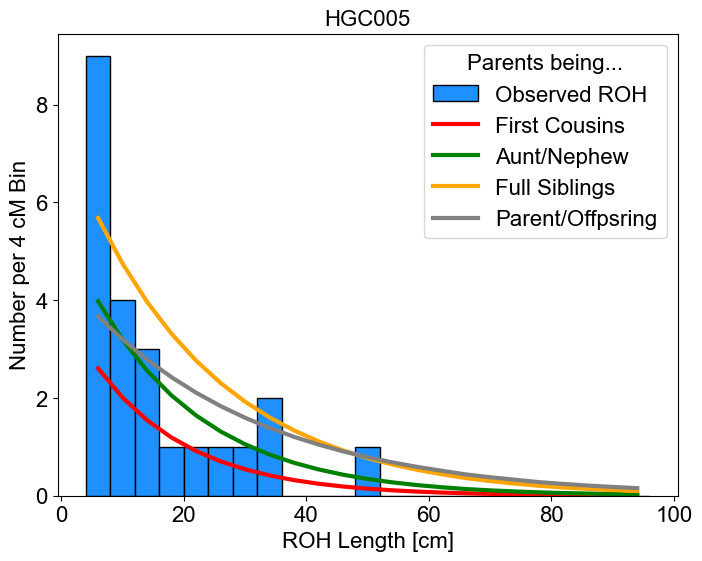

In [31]:
plot_pde_individual(iid="HGC005", min_cm=4, bw_cm=4, 
                    kde_plot=False, plotlim=[4, 100], prefix_out="",
                    savepath="", folder="./HGC/", title="HGC005",
                    
                    comm_ancs=[4,4,4,2], ms=[6,5,4,3], labels=["First Cousins", "Aunt/Nephew", "Full Siblings", "Parent/Offpsring"],
                    cs=["red", "green", "orange", "gray"], leg_loc="upper right")

In [ ]:
### Which is the most likely degree of parental relatedness?

Loaded ROH of 5 individuals. Plotting their sum...


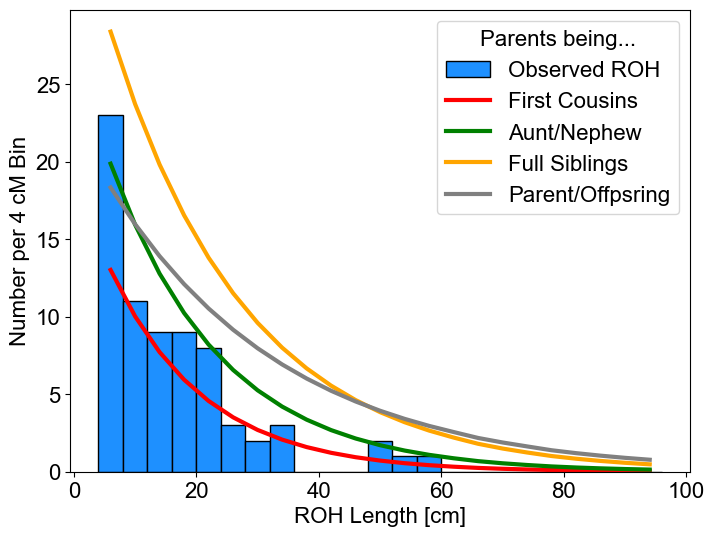

In [6]:
plot_pde_individual(iid = ["HGC005", "HGC006", "HGC017", "HGC020", "HGC024"], min_cm=4, bw_cm=4, 
                    kde_plot=False, plotlim=[4, 100], prefix_out="",
                    comm_ancs=[4,4,4,2], ms=[6,5,4,3], labels=["First Cousins", "Aunt/Nephew", "Full Siblings", "Parent/Offpsring"],
                    cs=["red", "green", "orange", "gray"], title="", leg_loc="upper right",
                    savepath="", folder="./HGC/")

## Ne size estimation

Now we will learn how to estimate pop size from specific length bins of ROH. The model assumes a panmictic population, so think of this estimate as the size of ancestors' pool at the time depth of the origin of the ROH that you are fitting

In [23]:
from hapsburg.PackagesSupport.fit_ne import MLE_ROH_Ne, load_roh_vec

In [24]:
#df1 = pd.read_csv("./HGC/combined_roh05.csv", sep='\t')
df2 = df1[df1["sum_roh>20"]<50] # Reomve inbred individuals
iids = df2["iid"].values ## create list of all iids

print(f"Loaded {len(iids)} IIDs")

Loaded 10 IIDs


### Load the data for the MLE analysis

In [25]:
roh_vec = load_roh_vec(iids=iids, base_path = "/vol/volume/haproh/HAAM25_hapROH/HGC", suffix = "_roh_full.csv")

### Use ML to fit Ne
With roh_vec loaded, we can fit the Ne. We use a class implemented in hapROH which returns a pandas dataframe with most likely estimate and two colums for the lower and upper bound of the 95% CI intervall.

Note that the ratio of Ne to census size can be 0.1-0.3 depending on demography (skew of reproductive success, how many generations alive etc)

**By default the estimates are reported for 2Ne!**

In [26]:
%%time
output = True
min_len = 4 # Min ROH length in cM to fit 
max_len = 20 # Max ROH length in cM to fit

mle = MLE_ROH_Ne(start_params = 1000, endog = roh_vec, min_len = min_len, max_len = max_len, chr_lgts = [], ## Lengths of Chromosomes to fit (in cM). If len 0, use defaulr for 1240k
                 error_model = False, output = False)
fit = mle.fit_ll_profile()

mle.summary/2

CPU times: user 740 ms, sys: 5.27 ms, total: 745 ms
Wall time: 743 ms


,coef,std err,0.025,0.975,n
0,2106.660872,NaN,1460.277756,3189.883404,5.0


## Estimating Contamination from ROH blocks

We will now try the hapCon_ROH module to jointly estimate ROH and contamination rates

**Application:** Female individuals with ROH (like HGC011)

**Input:** Bam file

We will also need `BamTable` or `samtools` and per-chromosome `.bed` files to create the `readcounts` per 1240k position.

In [7]:
%%time
import os
os.chdir("/vol/volume/haproh/HAAM25_hapROH/haproh_cont")
os.getcwd()

## with samtools
!for ch in {1..22}; do ~/bin/miniconda3/envs/nf-core-eager/bin/samtools mpileup --positions /vol/volume/haproh/1000g1240khdf5/1240kChr$ch.bed -r $ch -q 30 -Q 30 -o ./mpileup/HGC011.chr$ch.mpileup /vol/volume/haproh/data/HGC011.dslib_rmdup.q30.bam; done

## with BamTable (if installed)
#!for ch in {1..22}; do BamTable -f /vol/volume/haproh/1000g1240khdf5/1240kChr$ch.bed -b -A  /vol/volume/haproh/data/HGC011.dslib_rmdup.q30.bam > ./HGC011.chr$ch.BamTable; done

[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
[mpileup] 1 samples in 1 input files
CPU times: user 175 ms, sys: 72.5 ms, total: 247 ms
Wall time: 10.5 s


In [ ]:
!hapCon_ROH -h

In [ ]:
%%time
!hapCon_ROH --mpileup ./mpileup -i HGC011 -p 8 --prefix iter_ROH -r /vol/volume/haproh/1000g1240khdf5/all1240/chr --meta /vol/volume/haproh/1000g1240khdf5/all1240/meta_df_all.csv

saving hdf5 files in /vol/volume/haproh/HAAM25_hapROH/haproh_cont/hdf5
exclude 0 sites outside the specified region
exclude 0 non-SNP sites
exclude 0 sites outside the specified region
exclude 0 non-SNP sites
exclude 0 sites outside the specified region
exclude 0 non-SNP sites
exclude 0 sites outside the specified region
exclude 0 non-SNP sites
exclude 0 sites outside the specified region
exclude 0 non-SNP sites
exclude 0 sites outside the specified region
exclude 0 non-SNP sites
exclude 0 sites outside the specified region
exclude 0 non-SNP sites
exclude 0 sites outside the specified region
exclude 0 non-SNP sites
saving sample as HGC011 in /vol/volume/haproh/HAAM25_hapROH/haproh_cont/hdf5/HGC011.chr8.hdf5
saving sample as HGC011 in /vol/volume/haproh/HAAM25_hapROH/haproh_cont/hdf5/HGC011.chr7.hdf5
exclude 0 sites outside the specified region
exclude 0 non-SNP sites
exclude 0 sites outside the specified region
exclude 0 non-SNP sites
saving sample as HGC011 in /vol/volume/haproh/HAAM2

What is the estimated contamination of our sample?

### Let's have a look at how (low) contamination looks like in the ROH blocks 
Also, we can identify False Positive ROH Segments

First, let's find where are the ROH identified for HGC011

In [33]:
!cat ./hapRoh_iter/HGC011/chr*/roh.csv

/vol/volume/haproh/HAAM25_hapROH/haproh_cont
Start,End,StartM,EndM,length,lengthM,iid,ch,StartPosGRCh37,EndPosGRCh37
Start,End,StartM,EndM,length,lengthM,iid,ch,StartPosGRCh37,EndPosGRCh37
7922,11023,0.35043201,0.46971399,3101,0.11928198000000001,HGC011,11,20161913,30774280
Start,End,StartM,EndM,length,lengthM,iid,ch,StartPosGRCh37,EndPosGRCh37
204,1732,0.016089,0.101142,1528,0.08505299999999999,HGC011,12,672372,4081766
Start,End,StartM,EndM,length,lengthM,iid,ch,StartPosGRCh37,EndPosGRCh37
Start,End,StartM,EndM,length,lengthM,iid,ch,StartPosGRCh37,EndPosGRCh37
Start,End,StartM,EndM,length,lengthM,iid,ch,StartPosGRCh37,EndPosGRCh37
Start,End,StartM,EndM,length,lengthM,iid,ch,StartPosGRCh37,EndPosGRCh37
Start,End,StartM,EndM,length,lengthM,iid,ch,StartPosGRCh37,EndPosGRCh37
20023,22036,1.04194498,1.16272295,2013,0.12077797000000001,HGC011,17,71546716,76555985
Start,End,StartM,EndM,length,lengthM,iid,ch,StartPosGRCh37,EndPosGRCh37
4884,6249,0.363098,0.425623,1365,0.062525,HGC011,18,12048

Successfully loaded Data from: ./hapRoh_iter/HGC011/chr11/


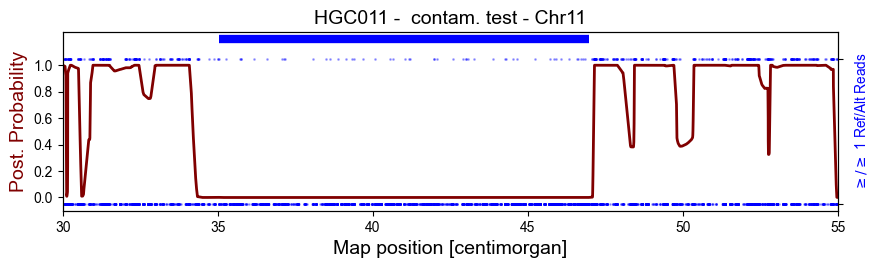

In [36]:
from hapsburg.figures.plot_posterior import plot_posterior_cm

plot_posterior_cm(folder = "./hapRoh_iter/HGC011/chr11/", savepath = "", empirical = True, m=1, cm_lim = [30, 55], groundtruth = False, min_cm=1, readcount=True, figsize = (10,4), 
                  title = "HGC011 -  contam. test - Chr11")

A few regions outside the called ROH might appear to be in ROH state, but they are very short (<4cM) and cannot be confidently called as real ROH. That's why in contamination estimates we only use ROH blocks > 5 cM.